In [3]:
from tensorflow.keras.datasets import boston_housing

In [4]:
(x_train,y_train),(x_test,y_test)=boston_housing.load_data()

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)

In [8]:
x_test=ss.fit_transform(x_test)

In [9]:
from tensorflow.keras import models,layers

In [10]:
def model_create():
    model=models.Sequential()
    model.add(layers.Dense(64,activation="relu",input_shape=(13,)))
    model.add(layers.Dense(1))
    model.compile(optmizer="adam",loss="mse",metrics=["mae"])
    return model

In [11]:
import numpy as np

In [14]:
k=4
num_val_sample=len(x_train)//k
num_epoch=100
all_score=[]

In [18]:
for i in range(k):
    print(i,"is processing")
    val_data=x_train[i*num_val_sample:(i+1)*num_val_sample]
    val_target=y_train[i*num_val_sample:(i+1)*num_val_sample]
    partial_x_train=np.concatenate([x_train[:i*num_val_sample],x_train[(i+1)*num_val_sample:]],axis=0)
    partial_y_train=np.concatenate([y_train[:i*num_val_sample],y_train[(i+1)*num_val_sample:]],axis=0)
    model=model_create()
    model.fit(partial_x_train,partial_y_train,batch_size=1,epochs=100,verbose=0)
    val_mse,val_mae=model.evaluate(val_data,val_target,verbose=0)
    all_score.append(val_mae)

0 is processing
1 is processing
2 is processing
3 is processing


In [20]:
np.mean(all_score)

2.2513297

In [24]:
all_mae_histories=[]
for i in range(k):
    print(i,"is processing")
    val_data=x_train[i*num_val_sample:(i+1)*num_val_sample]
    val_target=y_train[i*num_val_sample:(i+1)*num_val_sample]
    partial_x_train=np.concatenate([x_train[:i*num_val_sample],x_train[(i+1)*num_val_sample:]],axis=0)
    partial_y_train=np.concatenate([y_train[:i*num_val_sample],y_train[(i+1)*num_val_sample:]],axis=0)
    model=model_create()
    history=model.fit(partial_x_train,partial_y_train,batch_size=1,epochs=100,validation_data=[val_data,val_target]
                      ,verbose=0)
    mae_history=history.history["val_mae"]
    all_mae_histories.append(mae_history)

0 is processing
1 is processing
2 is processing
3 is processing


In [34]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(4)]

In [35]:
import matplotlib.pyplot as plt

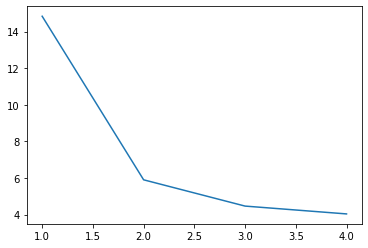

In [37]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)

In [38]:
average_mae_history

[14.839922, 5.898473, 4.461934, 4.0340858]